In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import config 
import sql_con

In [2]:
# get module variables
ROOT_DIR = config.ROOT_DIR
select_records = sql_con.select_records
insert_records = sql_con.insert_records
update_records = sql_con.update_records
conn_odbc = sql_con.conn_odbc
read_contents = sql_con.read_contents

In [3]:
coffee_production = pd.read_csv(rf"{ROOT_DIR}/data/total-production.csv")
coffee_production.head()

,total_production,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Angola,50.3450,79.3310,77.5200,32.6080,76.802,62.1090,70.925,64.330,85.3440,...,13.4200,34.9700,28.7150,32.7900,34.9350,39.4050,40.5150,44.8300,35.0060,40.3874
1,Bolivia (Plurinational State of),122.7770,103.5360,120.2350,50.8230,116.944,142.4850,124.579,140.719,137.9850,...,128.4751,117.2249,131.8354,105.2812,119.9122,99.8766,84.2191,77.9835,83.8112,82.5687
2,Brazil,27285.6286,27293.4934,34603.3542,28166.9786,28192.047,18060.2022,29196.743,26148.004,36760.8533,...,43976.8120,55428.4102,48591.8289,55418.0012,54688.9664,53304.7669,52870.5876,56788.1784,52739.8635,62924.8836
3,Burundi,487.3930,667.1990,620.2380,393.3540,664.143,433.9800,400.969,249.785,491.9920,...,111.6130,352.9776,204.1328,405.9615,163.2177,247.5500,274.1017,248.7933,202.1079,178.4206
4,Ecuador,1503.8150,2123.8240,1185.4800,2069.0070,2375.766,1888.2330,1992.914,1190.663,1205.9680,...,813.2849,853.9798,825.4144,828.1024,665.5450,644.0112,644.4926,644.8845,623.5744,601.0001


In [4]:
# reshape dataframe to have years in index position and countries in columns
coffee_production = coffee_production.set_index("total_production").transpose()
coffee_production.index.set_names("Year", inplace=True)
coffee_production.head()

total_production,Angola,Bolivia (Plurinational State of),Brazil,Burundi,Ecuador,Indonesia,Madagascar,Malawi,Papua New Guinea,Paraguay,...,Panama,Sierra Leone,Sri Lanka,Thailand,Togo,Trinidad & Tobago,Uganda,Venezuela,Viet Nam,Yemen
Year,,,,,,,,,,,,,,,,,,,,,
1990,50.345,122.777,27285.6286,487.393,1503.815,7441.383,982.447,104.628,962.841,130.627,...,214.987,42.783,95.870,757.017,161.308,14.581,1955.009,1122.477,1310.288,0.0
1991,79.331,103.536,27293.4934,667.199,2123.824,8493.196,932.513,124.286,746.816,79.653,...,192.532,54.379,81.549,1468.936,432.652,17.792,2088.001,940.704,1437.848,0.0
1992,77.520,120.235,34603.3542,620.238,1185.480,5569.478,1121.684,137.161,900.111,54.291,...,196.978,39.084,53.181,1254.945,85.648,14.328,2185.074,1215.298,2340.447,0.0
1993,32.608,50.823,28166.9786,393.354,2069.007,6743.288,441.859,62.111,1019.481,70.046,...,142.066,37.451,53.790,1275.201,194.939,16.079,3141.706,1332.881,3020.216,0.0
1994,76.802,116.944,28192.0470,664.143,2375.766,5367.878,641.372,84.112,1138.659,24.689,...,248.313,72.738,42.448,1399.135,176.296,18.435,2392.753,988.996,3631.609,0.0


In [5]:
coffee_production.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1990 to 2018
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Angola                            29 non-null     float64
 1   Bolivia (Plurinational State of)  29 non-null     float64
 2   Brazil                            29 non-null     float64
 3   Burundi                           29 non-null     float64
 4   Ecuador                           29 non-null     float64
 5   Indonesia                         29 non-null     float64
 6   Madagascar                        29 non-null     float64
 7   Malawi                            29 non-null     float64
 8   Papua New Guinea                  29 non-null     float64
 9   Paraguay                          29 non-null     float64
 10  Peru                              29 non-null     float64
 11  Rwanda                            29 non-null     float64
 12  Timor-Lest

#### Visualize top 10 coffee producers

In [6]:
top_10_producers = coffee_production.sum().sort_values(ascending=False).iloc[:10]
top_10_producers

total_production
Brazil       1.190966e+06
Viet Nam     4.395410e+05
Colombia     3.458714e+05
Indonesia    2.451168e+05
Ethiopia     1.415429e+05
India        1.320257e+05
Mexico       1.269082e+05
Guatemala    1.134011e+05
Honduras     1.054566e+05
Uganda       9.314637e+04
dtype: float64

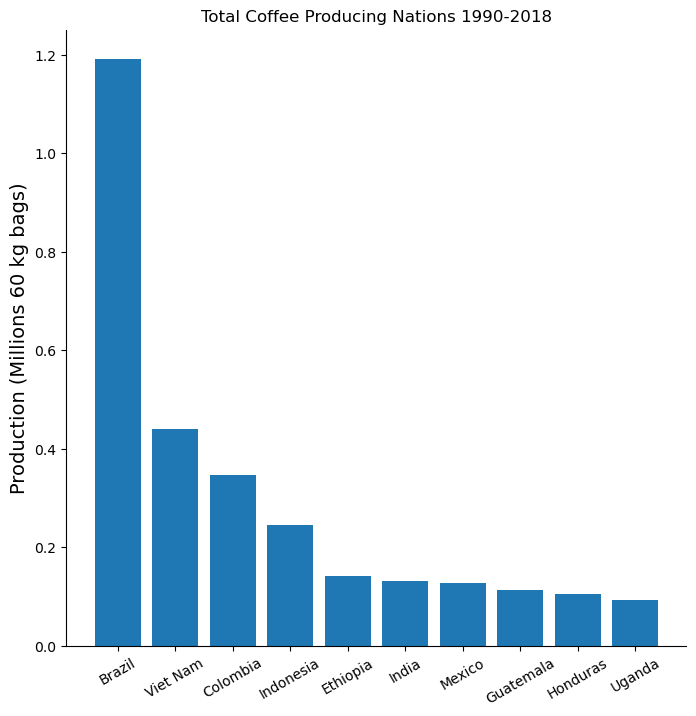

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.bar(top_10_producers.index, top_10_producers/1000000)

ax.set_title("Total Coffee Producing Nations 1990-2018")
ax.set_ylabel("Production (Millions 60 kg bags)", fontsize=14)
ax.xaxis.set_tick_params(rotation=30)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

#### Visualize top 5 producers over time

In [8]:
# cast index to pandas datetime64[ns] data type to use them as data points on x axis
top5 = coffee_production.loc[:, ["Brazil", "Viet Nam", "Colombia", "Indonesia", "Ethiopia"]]
top5.index = pd.to_datetime(top5.index)
top5.head()

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia
Year,,,,,
1990-01-01,27285.6286,1310.288,14396.000,7441.383,2909.451
1991-01-01,27293.4934,1437.848,17980.397,8493.196,2924.664
1992-01-01,34603.3542,2340.447,14946.878,5569.478,1825.171
1993-01-01,28166.9786,3020.216,11422.422,6743.288,2967.004
1994-01-01,28192.0470,3631.609,12964.000,5367.878,2762.730


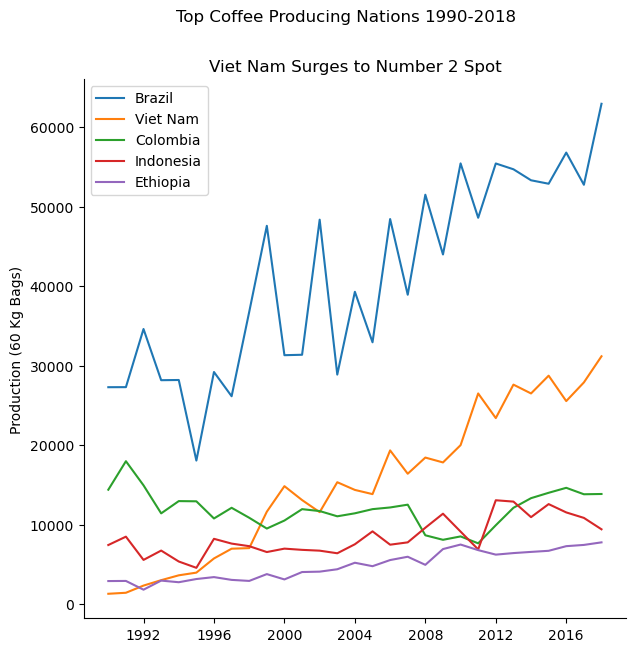

In [9]:
fig, ax = plt.subplots(figsize=(7, 7))

idx = top5.index
ax.plot(idx, coffee_production["Brazil"], label="Brazil")
ax.plot(idx, coffee_production["Viet Nam"], label="Viet Nam")
ax.plot(idx, coffee_production["Colombia"], label="Colombia")
ax.plot(idx, coffee_production["Indonesia"], label="Indonesia")
ax.plot(idx, coffee_production["Ethiopia"], label="Ethiopia")

fig.suptitle("Top Coffee Producing Nations 1990-2018")
ax.set_title("Viet Nam Surges to Number 2 Spot")
ax.set_ylabel("Production (60 Kg Bags)")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend()

## COMPOSITION OVER TIME
#### Our client is interested in looking at how Brazil's share of global coffee production has changed over time
#### Build a plot that shows global total production as well as Brazil's contribution to global production over time

In [10]:
brazil_vs_others = coffee_production.assign(rest_of_world = lambda x: x.drop("Brazil", axis=1).sum(axis=1)).loc[:, ["Brazil", "rest_of_world"]]
brazil_vs_others.head()

total_production,Brazil,rest_of_world
Year,,
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.0470,65121.147


In [11]:
brazil_vs_others.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29 entries, 1990 to 2018
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Brazil         29 non-null     float64
 1   rest_of_world  29 non-null     float64
dtypes: float64(2)
memory usage: 696.0+ bytes


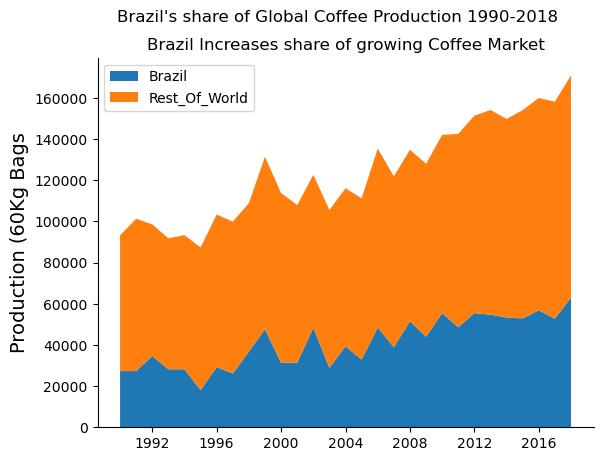

In [12]:
# construct stack plot to guage Brazil's contribution compared to rest of the world
fig, ax = plt.subplots()

idx = pd.to_datetime(brazil_vs_others.index)
ax.stackplot(
    idx,
    brazil_vs_others["Brazil"],
    brazil_vs_others["rest_of_world"],
    labels=["Brazil", "Rest_Of_World"]
)

fig.suptitle("Brazil's share of Global Coffee Production 1990-2018")
ax.set_title("Brazil Increases share of growing Coffee Market")
ax.set_ylabel("Production (60Kg Bags", fontsize=14)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend(loc="upper left")

## PRICE RELATIONSHIPS
#### We want to explore how Brazil compares to its competitors in terms of production using scatterplot

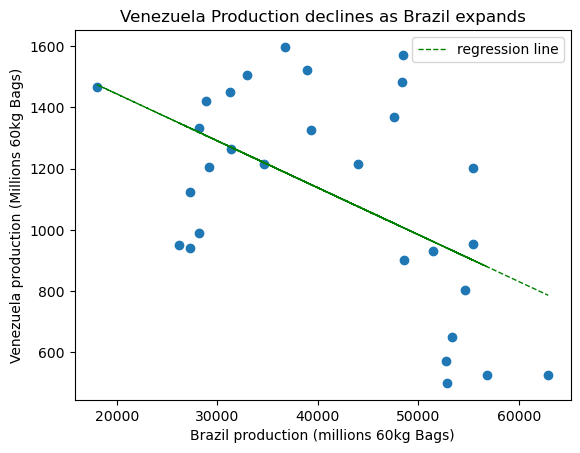

In [33]:
fig, ax = plt.subplots()
x = coffee_production["Brazil"]
y = coffee_production["Venezuela"]

ax.scatter(
    x,
    y
)

ax.set_title("Venezuela Production declines as Brazil expands")
ax.set_ylabel("Venezuela production (Millions 60kg Bags)")
ax.set_xlabel("Brazil production (millions 60kg Bags)")

# get slope(m) and y-intercept(b) of linear regression line for independent variable (Brazil's production) and dependent variable (Venezuela's production)
m, b = np.polyfit(x, y, deg=1)

# plot linear regression line based on slope and intercept for given bivariate data
ax.plot(
    x,
    m*x + b,
    color="green",
    linewidth=1,
    linestyle="--",
    label="regression line"
)

ax.legend()

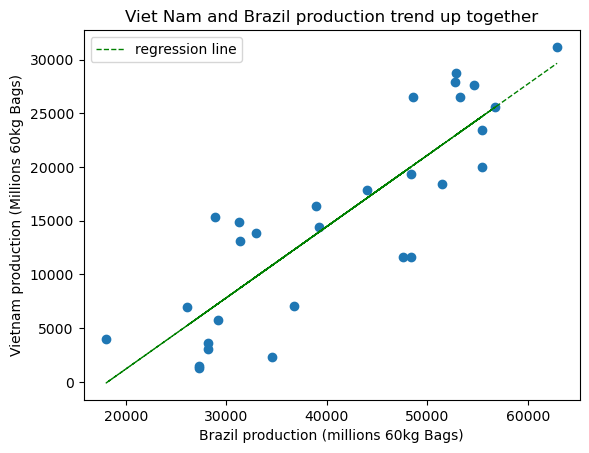

In [34]:
fig, ax = plt.subplots()
x = coffee_production["Brazil"]
y = coffee_production["Viet Nam"]

ax.scatter(
    x,
    y
)

ax.set_title("Viet Nam and Brazil production trend up together")
ax.set_ylabel("Vietnam production (Millions 60kg Bags)")
ax.set_xlabel("Brazil production (millions 60kg Bags)")

# get slope(m) and y-intercept(b) of linear regression line for independent variable (Brazil's production) and dependent variable (Venezuela's production)
m, b = np.polyfit(x, y, deg=1)

# plot linear regression line based on slope and intercept for given bivariate data
ax.plot(
    x,
    m*x + b,
    color="green",
    linewidth=1,
    linestyle="--",
    label="regression line"
)

ax.legend()

## COMPOSITION OF COFFEE PRODUCTION
#### Create a Pie chart with the top 5 producers as well as the sum of the rest of countries
#### Finally create two donut charts, one representing Brazil's share of global production in 1990, and one for Brazil's share in 2018

In [64]:
coffee_production_top5_2018 = coffee_production.assign(Rest_of_World=lambda x: x.drop(["Brazil", "Viet Nam", "Colombia", "Indonesia", "Ethiopia"], axis=1).sum(axis=1)).loc["2018", ["Brazil", "Viet Nam", "Colombia", "Indonesia", "Ethiopia", "Rest_of_World"]]
coffee_production_top5_2018

total_production
Brazil           62924.8836
Viet Nam         31174.0742
Colombia         13857.9620
Indonesia         9417.5942
Ethiopia          7776.2234
Rest_of_World    45786.0003
Name: 2018, dtype: float64

Text(0.5, 0.98, 'Share of Global Coffee Production 2018')

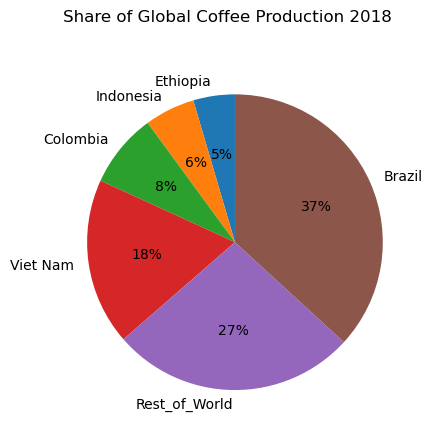

In [73]:
fig, ax = plt.subplots()
coffee_production_top5_2018.sort_values(inplace=True)

ax.pie(
    coffee_production_top5_2018,
    autopct="%.0f%%",
    labels=coffee_production_top5_2018.index,
    startangle=90
)

fig.suptitle("Share of Global Coffee Production 2018")